<img src="https://github.com/FarzadNekouee/DCGAN-Photorealistic-Face-Generator/blob/master/image.png?raw=true" width="1800">

<div style="border-radius:10px; padding: 15px; background-color: #d5d5ed; font-size:125%; text-align:left">

We're all probably familiar with the intriguing website [This Person Does Not Exist](https://thispersondoesnotexist.com/), showcasing the power of modern machine learning in generating photorealistic, yet entirely fictitious, human faces. Inspired by this, our project aims to design a model capable of producing photorealistic face images that, although resembling real people, are completely synthesized. Due to resource constraints, we will be focusing on generating images at a lower resolution of __64x64__ pixels. In this endeavor, we're utilizing a subset of the [CelebFaces Attributes (CelebA) Dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html), specifically the first 50,000 images. This subset is conveniently available on [Kaggle](https://www.kaggle.com/datasets/farzadnekouei/50k-celebrity-faces-image-dataset). Our chosen method for image synthesis is the __Deep Convolutional Generative Adversarial Networks__ (__DCGANs__). Prior to training this DCGAN model, our dataset will undergo a rigorous preprocessing phase to ensure optimal results. The ultimate objective is to train our DCGAN to synthesize new, lifelike faces that evoke the essence of the celebrities in our training set, albeit in a fabricated manner.


<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #d5d5ed; font-size:120%; text-align:left">

<h2 align="left"><font color=#22199e>Table of Contents: </font></h2>
    
* <a href="#import" style="color: #22199e; text-decoration: none;">Step 1 | Import Necessary Libraries</a>
* <a href="#preprocess" style="color: #22199e; text-decoration: none;">Step 2 | Loading and Preprocessing the Dataset</a>
* <a href="#architecture" style="color: #22199e; text-decoration: none;">Step 3 | Define DCGAN Architecture</a>
* <a href="#data_preparation" style="color: #22199e; text-decoration: none;">Step 4 | Prepare Data for Training DCGAN</a>
* <a href="#train" style="color: #22199e; text-decoration: none;">Step 5 | Train DCGAN & Monitor Progress</a>

<h2 align="left"><font color='#22199e'>Let's get started!</font></h2>

<a id="import"></a>
# <p style="background-color:#22199e; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Necessary Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #d5d5ed; font-size:115%; text-align:left">
    
First of all, let's import necessary libraries: 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros, ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Conv2DTranspose, LeakyReLU
from keras.layers import BatchNormalization, Dropout, Reshape, Flatten

D1221 15:24:38.830814738      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D1221 15:24:38.830838594      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D1221 15:24:38.830841854      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D1221 15:24:38.830844441      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D1221 15:24:38.830846717      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D1221 15:24:38.830851744      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D1221 15:24:38.830854270      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D1221 15:24:38.

<a id="preprocess"></a>
# <p style="background-color:#22199e; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Loading and Preprocessing the Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #d5d5ed; font-size:115%; text-align:left">

The first step in our pipeline involves preparing our data for the DCGAN model. For this project, we're using a subset of the __CelebFaces Attributes (CelebA) Dataset__, which is available on [Kaggle](https://www.kaggle.com/datasets/farzadnekouei/50k-celebrity-faces-image-dataset).

To ensure our model receives optimal data, we perform the following preprocessing steps on each image:
    
* __Read Image__: We start by obtaining the path to every image within the dataset directory.
    
* __Crop__: Each image gets cropped, removing 20 pixels from the top and bottom, resulting in a square image.
    
* __Resize__: Given the computational constraints and our DCGAN's architecture, we resize the images to a resolution of 64x64 pixels.
    
* __Normalize__: Images are converted to numpy arrays and then normalized to the range [-1, 1] to facilitate the neural network's training process.

By the end of this preprocessing phase, our dataset will be a numpy array with the shape indicating the number of images and the dimensions of each image.

<div style="border-radius:10px; padding: 15px; background-color: #d5d5ed; font-size:115%; text-align:left">
<h3 align="left"><font color=royalblue>🔔 Note:</font></h3>   
    
Given constraints on computational resources and the desire to streamline training times, we have opted to train our model on a subset of 20,000 images. However, if resources permit, training with a larger dataset can potentially enhance the model's performance and yield improved results.

In [2]:
# Define the directory of your images on Kaggle
dataset_dir = "/kaggle/input/50k-celebrity-faces-image-dataset/Celebrity_Faces_Dataset" 

# Get a list of all image paths in the directory
image_paths = glob.glob(os.path.join(dataset_dir, '*.jpg'))

# Considering only the first 20,000 images
image_paths = image_paths[:20000]

# Create a function to open, crop and resize images
def load_and_preprocess_real_images(image_path, target_size=(64, 64)):
    # Open the image
    img = Image.open(image_path)
    # Crop 20 pixels from the top and bottom to make it square
    img = img.crop((0, 20, 178, 198))
    # Resize the image
    img = img.resize(target_size)
    # Convert to numpy array and scale to [-1, 1]
    img = np.array(img)/127.5 - 1
    return img

# Open, crop and resize all images
dataset = np.array([load_and_preprocess_real_images(img_path) for img_path in image_paths])

# Print dataset shape
print(dataset.shape)

(20000, 64, 64, 3)


<div style="border-radius:10px; padding: 15px; background-color: #d5d5ed; font-size:115%; text-align:left">

Having preprocessed our dataset, it's now time to visually examine the images that we'll be using to train our DCGAN model. Here, we're displaying a small sample of the processed images:

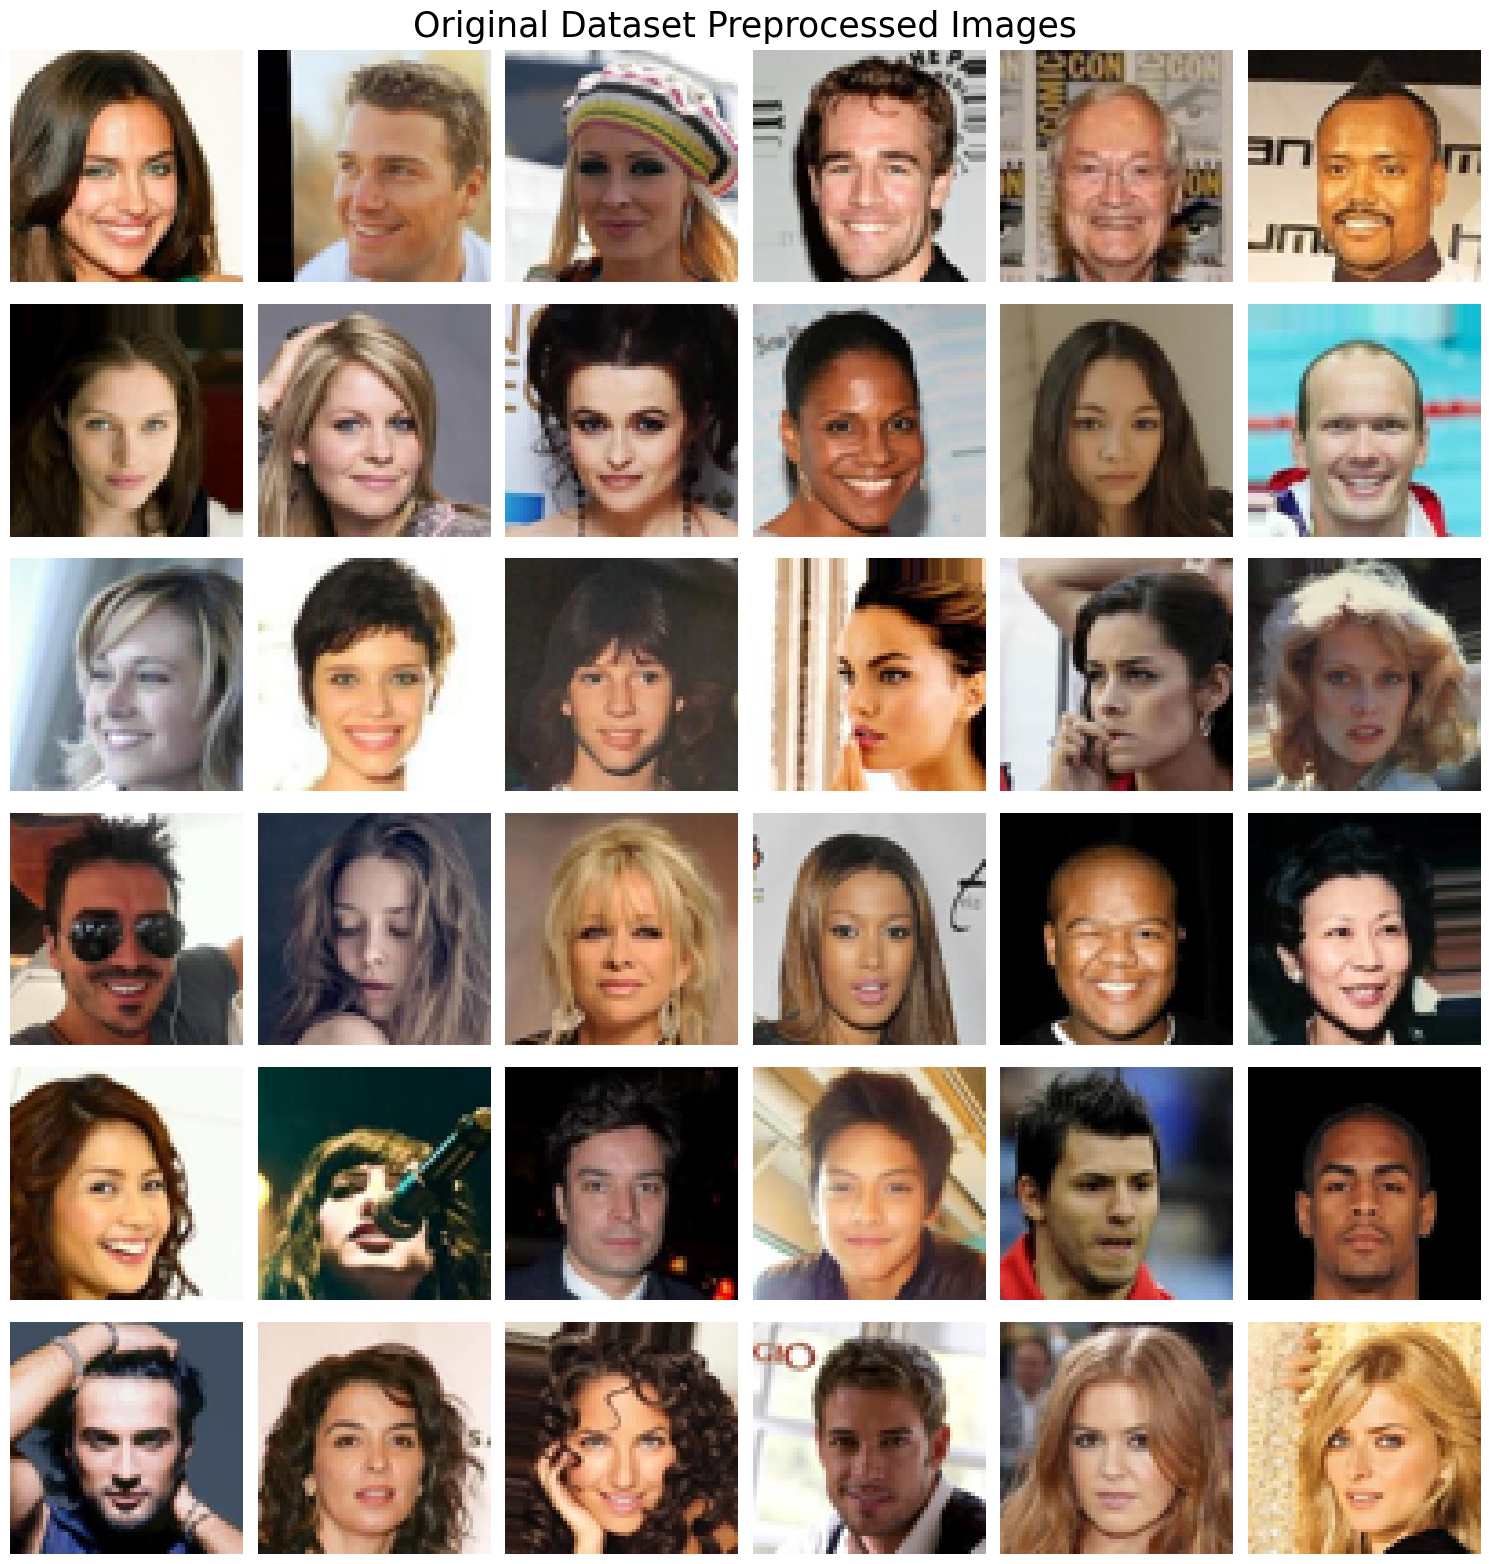

In [3]:
# Create a subplot for the first 25 images
fig, axes = plt.subplots(6, 6, figsize=(15, 16))

for i, ax in enumerate(axes.flat):
    # Get the i-th image
    img = dataset[i]
    # Rescale the image to [0, 1] for plotting
    img_rescaled = (img + 1) / 2
    # Plot the image on the i-th subplot
    ax.imshow(img_rescaled)
    ax.axis('off')

# Add a super title
fig.suptitle('Original Dataset Preprocessed Images', fontsize=25)

plt.tight_layout()
plt.show()

<a id="architecture"></a>
# <p style="background-color:#22199e; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Define DCGAN Architecture</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #d5d5ed; font-size:115%; text-align:left">
    
In this part, we define the architecture for the __Discriminator__, __Generator__, and the __combined GAN model__:
    
* The __Discriminator__ is a Convolutional Neural Network (CNN) that classifies whether an image is real or fake (generated). 
 
* The __Generator__ is a CNN that upsamples a random noise vector into an image (fake image). 
 
* The __combined GAN model__, where the Discriminator's trainability is frozen, is used for training the Generator. It takes noise as input and the Discriminator classifies the generated images. In this setup, the Generator learns to create images that the Discriminator is unable to distinguish from real images.

In [4]:
def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    
    # Initial convolutional layer
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding='same', input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    
    # Second convolutional layer
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Third convolutional layer
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Fourth convolutional layer
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Fifth convolutional layer
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(0.2))

    # Flatten and dense layer for classification
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    # Define optimizer and compile model
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Build and display discriminator summary
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 256)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         5

In [5]:
def build_generator(latent_dim, channels=3):
    model = Sequential()
    
    # Initial dense layer
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    
    # Reshape to (16, 16, 128) tensor for convolutional layers
    model.add(Reshape((16, 16, 128)))
    
    # First deconvolutional layer
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Second deconvolutional layer
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(0.2))  
    
    # Third deconvolutional layer
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(0.2))  
    
    # Fourth deconvolutional layer
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(0.2))  
    
    # Output convolutional layer with 'tanh' activation
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding='same'))
    
    return model

# Build and display generator summary
generator = build_generator(100)
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32768)             3309568   
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 128)      262272    
 ranspose)                                            

In [6]:
def build_gan(generator, discriminator):
    
    # Setting discriminator as non-trainable, so its weights won't update when training the GAN
    discriminator.trainable = False

    # Creating the GAN model
    model = Sequential()
    
    # Adding the generator
    model.add(generator)
    
    # Adding the discriminator
    model.add(discriminator)

    # Compiling the GAN model
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

<a id="data_preparation"></a>
# <p style="background-color:#22199e; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | Prepare Data for Training DCGAN</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #d5d5ed; font-size:115%; text-align:left">

Afterward, I am going to define some functions help in creating training batches for the Discriminator and Generator:

* `generate_real_samples` - Selects random real images from the dataset and labels them as __1__, indicating they're real.

    
* `generate_noise_samples` - Produces random noise vectors. These are the inputs to the Generator, which it uses to create fake images.

    
* `generate_fake_samples` - Uses the Generator to produce fake images from the noise vectors and labels them as __0__, indicating they're fake.

Together, these functions ensure that the Discriminator is trained to distinguish between real and fake images, while the Generator tries to produce images that the Discriminator can't differentiate from real ones. 

In [7]:
def generate_real_samples(dataset, num_samples):
    sample_indices = randint(0, dataset.shape[0], num_samples)
    X = dataset[sample_indices]
    y = ones((num_samples, 1))
    return X, y

In [8]:
def generate_noise_samples(num_samples, noise_dim):
    X_noise = randn(noise_dim * num_samples)
    X_noise = X_noise.reshape(num_samples, noise_dim)
    return X_noise 

In [9]:
def generate_fake_samples(generator, noise_dim, num_samples):
    X_noise = generate_noise_samples(num_samples, noise_dim)
    X = generator.predict(X_noise)
    y = zeros((num_samples, 1 ))
    return X, y

<a id="train"></a>
# <p style="background-color:#22199e; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Train DCGAN & Monitor Progress</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #d5d5ed; font-size:115%; text-align:left">

Next, I am going to handle the simultaneous training of the Generator and Discriminator in our GAN model:

1. `generate_images` - This function creates images from noise using the current state of the Generator for a given epoch. The images created during training are saved and can be visualized later to provide a glimpse into the Generator's evolving performance.

2. `display_saved_images` - After training concludes, this function visualizes the saved images, presenting the progression of the Generator's capability across the epochs.
    
3. `plot_generated_images` - This function generates and plots images from noise using the current state of the Generator. It is utilized to visually track the Generator's performance during epochs as indicated in the training __output verbose__.

4. `train` - This function orchestrates the core GAN training process. It runs through all epochs, and within each epoch, iterates over all batches. For every batch:
   > - It first generates a batch of real images and a batch of fake images (created by the Generator), tagging each set with the appropriate labels. The Discriminator is then trained on these batches, and both its loss and accuracy metrics are computed.
   >
   > - Subsequently, a batch of noise samples is created, with the aim of deceiving the Discriminator into accepting these as genuine. As the Generator strives to amplify the loss, it learns to produce increasingly authentic-looking images.

The above process is iteratively executed until all epochs are finalized. The `plot_generated_images` function is used to visually track the Generator's progress in real-time during training, whereas the `display_saved_images` function is used at the end of training to showcase the stored images, shedding light on the Generator's refinement over the training epochs.

This combined training approach allows the Generator and Discriminator to learn together. The Discriminator improves at distinguishing fake images, and the Generator becomes better at fooling the Discriminator.

In [10]:
def generate_images(epoch, generator, num_samples=6, noise_dim=100):
    """
    Generate images from the generator model for a given epoch.
    """
    # Generate noise samples
    X_noise = generate_noise_samples(num_samples, noise_dim)
    
    # Use generator to produce images from noise
    X = generator.predict(X_noise, verbose=0)

    # Rescale images to [0, 1] for visualization
    X = (X + 1) / 2

    return X

In [11]:
def display_saved_images(saved_images, display_frequency):
    """
    Display the saved generated images after training.
    """
    for epoch, images in enumerate(saved_images):
        fig, axes = plt.subplots(1, len(images), figsize=(15, 3))
        for i, img in enumerate(images):
            axes[i].imshow(img)
            axes[i].axis('off')
        fig.suptitle(f"Generated Images at Epoch {epoch*display_frequency + 1}", fontsize=22)
        plt.tight_layout()
        plt.show()

In [12]:
def plot_generated_images(epoch, generator, num_samples=6, noise_dim=100, figsize=(15, 3)):
    """
    Plot and visualize generated images from the generator model for a given epoch.
    """
    
    # Generate noise samples
    X_noise = generate_noise_samples(num_samples, noise_dim)
    
    # Use generator to produce images from noise
    X = generator.predict(X_noise, verbose=0)

    # Rescale images to [0, 1] for visualization
    X = (X + 1) / 2

    # Plotting the images
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)

    for i in range(num_samples):
        axes[i].imshow(X[i])
        axes[i].axis('off')

    # Add a descriptive title
    fig.suptitle(f"Generated Images at Epoch {epoch+1}", fontsize=22)
    plt.tight_layout()
    plt.show()

In [13]:
def train(generator_model, discriminator_model, gan_model, dataset, noise_dimension,
          num_epochs=100, batch_size=128, display_frequency=10, verbose=1):
    
    # Create an empty list to store generated images for each epoch
    saved_images_for_epochs = []
    
    # Calculate the number of batches per epoch
    batches_per_epoch = int(dataset.shape[0] / batch_size)
    
    # Calculate half the size of a batch
    half_batch_size   = int(batch_size / 2)

    # Loop over all epochs
    for epoch in range(num_epochs):
        # Loop over all batches within this epoch
        for batch_num in range(batches_per_epoch):
            
            # Generate a batch of real images and their corresponding labels
            real_images, real_labels    = generate_real_samples(dataset, half_batch_size)
            # Train the discriminator on the real images and calculate loss and accuracy
            dsr_loss_real, dsr_acc_real = discriminator_model.train_on_batch(real_images, real_labels)

            # Generate a batch of fake images and their corresponding labels
            fake_images, fake_labels    = generate_fake_samples(generator_model, noise_dimension, half_batch_size)
            # Train the discriminator on the fake images and calculate loss and accuracy
            dsr_loss_fake, dsr_acc_fake = discriminator_model.train_on_batch(fake_images, fake_labels)
            
            # Calculate the average discriminator loss and accuracy over real and fake images
            dsr_loss = 0.5 * np.add(dsr_loss_real, dsr_loss_fake)
            dsr_acc  = 0.5 * np.add(dsr_acc_real, dsr_acc_fake)
            
            # Generate noise samples and their corresponding labels for training the generator
            gan_noise  = generate_noise_samples(batch_size, noise_dimension)
            gan_labels = np.ones((batch_size, 1))
            
            # Train the generator and calculate loss
            gen_loss, _ = gan_model.train_on_batch(gan_noise, gan_labels)
            
            if verbose:  # This condition checks if verbose is non-zero
                # Print training information for this batch
                print(f"[ Epoch: {epoch+1} , Batch: {batch_num+1} ] --> [ Discriminator Loss : {dsr_loss:.6f} , Discriminator Accuracy: {100*dsr_acc:.2f}% ] [ Generator Loss: {gen_loss:.6f} ]")
                     
        # Display generated images at the specified frequency
        if epoch % display_frequency == 0:
            generated_images_for_epoch = generate_images(epoch, generator_model)
            saved_images_for_epochs.append(generated_images_for_epoch)
            
            # Plot generated images to visualize the progress of the generator
            plot_generated_images(epoch, generator_model)

    # Due to constraints on Kaggle output file size, saving the model is commented out.
    # generator_model.save('Photorealistic_Face_Generator.h5')
    
    return saved_images_for_epochs

2/2 [==============================] - 1s 287ms/step


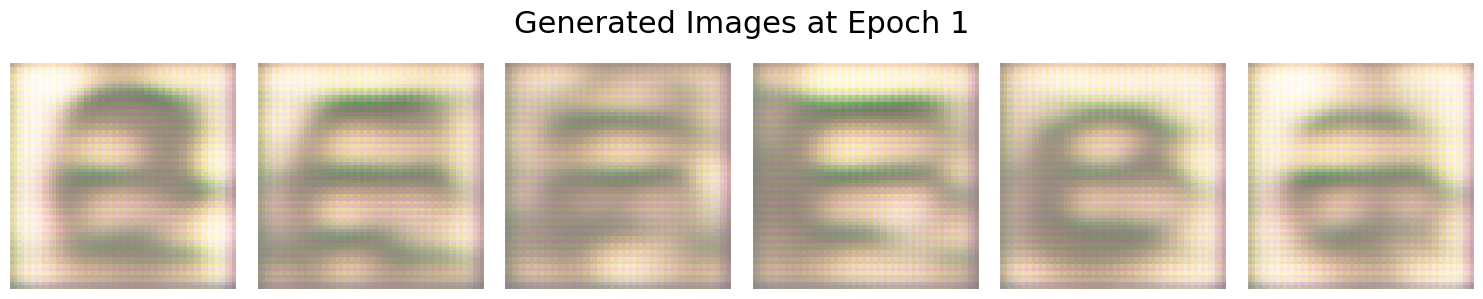

1/2 [==============>...............] - ETA: 0s

In [ ]:
# Set noise dimension for generator input
noise_dimension = 100

# Build discriminator model
discriminator = build_discriminator()

# Build generator model
generator = build_generator(noise_dimension)

# Combine generator and discriminator to form the GAN model
gan_model = build_gan(generator, discriminator)

# Train the GAN model on the dataset and get the saved images list
saved_images = train(generator, discriminator, gan_model, dataset, noise_dimension, num_epochs=251, batch_size=128, display_frequency=50, verbose=0)

In [ ]:
# Display all the saved images during 
display_saved_images(saved_images, display_frequency=50)

<div style="border-radius:12px; padding: 20px; background-color: #d5d5ed; font-size:120%; text-align:center">
    
Over __250 epochs__ of training, our GAN model has consistently evolved and refined its capabilities. Throughout these epochs, the generator's proficiency in producing lifelike faces has become increasingly evident in the images we've observed. However, due to the intensive demands of GAN training, constraints on our resources, and the limitations of our current model and dataset, there's still room for further enhancement. __Utilizing deeper models, a larger training dataset, and a higher number of epochs could potentially lead to even more realistic and refined results.__

At this juncture, I invite you to experience the generator's current capabilities by viewing some of its creations. The progress achieved after 250 epochs is captivating to behold:

In [ ]:
def plot_generated_images_after_training(generator, noise_dim=100, figsize=(15, 16)):
    
    fig, axes = plt.subplots(6, 6, figsize=figsize)
    
    for i, ax in enumerate(axes.flat):
        # Generate noise samples
        X_noise = generate_noise_samples(1, noise_dim)
        
        # Use generator to create an image
        X = generator.predict(X_noise, verbose=0)
        
        # Rescale images to [0, 1] for plotting
        X = (X + 1) / 2
        
        # Plot the image on the i-th subplot
        ax.imshow(X[0])
        ax.axis('off')

    # Add a super title
    fig.suptitle('Generated Images after Training for 250 Epochs', fontsize=25)
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_generated_images_after_training(generator)

<div style="display: flex; align-items: center; justify-content: center; border-radius: 10px; padding: 20px; background-color: #d5d5ed; font-size: 120%; text-align: center">

<strong>🎯 Feel free to visit the project repository on <a href="https://github.com/FarzadNekouee/DCGAN-Photorealistic-Face-Generator">GitHub</a> 🎯</strong>
</div>

<h2 align="left"><font color='#22199e'>Best Regards!</font></h2>